In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_o = pd.read_csv('/home/kevin/Downloads/IMDB Dataset.csv')
df = df_o.copy()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.shape

(50000, 2)

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
gp = df.groupby(['sentiment']).count().reset_index()
gp

,sentiment,review
0,negative,25000
1,positive,25000


In [9]:
df["y"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)
df.head()

,review,sentiment,y
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [10]:
import re
import string
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /home/kevin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kevin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kevin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))  # ou 'french'
lemmatizer = WordNetLemmatizer()

In [77]:
def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Suppression des URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Suppression des mentions (@user)
    text = re.sub(r'@\w+', '', text)
    
    # 4. Suppression des hashtags (#hashtag → hashtag)
    text = re.sub(r'#', '', text)
    
    # 5. Suppression des emojis
    text = emoji.replace_emoji(text, replace='')
    
    # 6. Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 7. Suppression des chiffres
    text = re.sub(r'\d+', '', text)
    
    # 8. Tokenisation + suppression stopwords + lemmatisation
    tokens = text.split()
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    
    return " ".join(tokens)

def clean_text_series(X):
    # X is typically an array-like of strings
    return [clean_text(x) for x in X]


In [17]:
df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,y,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter matteis love time money visually stunni...


In [21]:
df['text_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))


In [23]:
df["text_length"].describe()

count    50000.000000
mean       117.790200
std         88.820776
min          3.000000
25%         63.000000
50%         87.000000
75%        143.000000
max       1397.000000
Name: text_length, dtype: float64

<Axes: xlabel='text_length', ylabel='Count'>

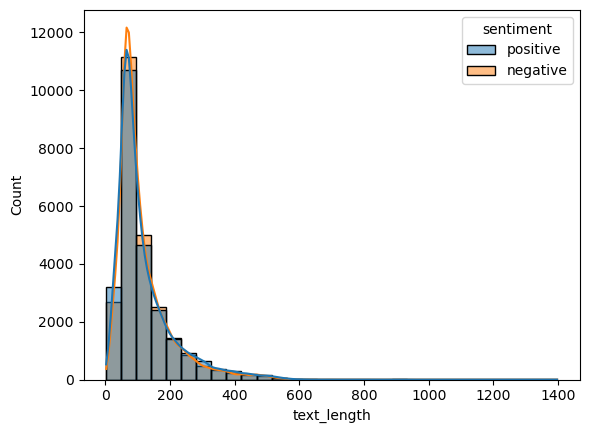

In [29]:
sns.histplot(data=df, x='text_length', hue='sentiment', bins=30, kde=True)

<Axes: xlabel='sentiment', ylabel='text_length'>

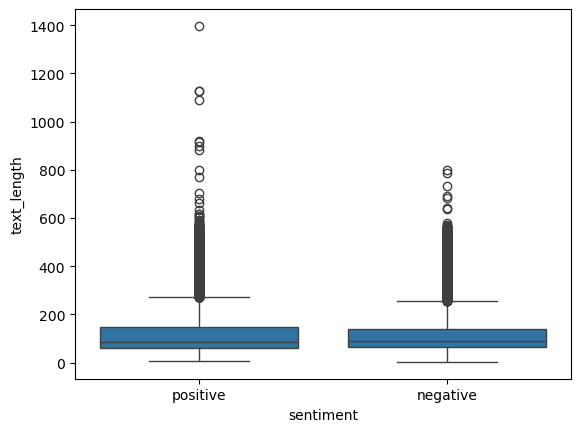

In [30]:
sns.boxplot(x='sentiment', y='text_length', data=df)

In [32]:
from collections import Counter

all_words = " ".join(df['cleaned_review']).split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[('movie', 98977),
 ('film', 89744),
 ('one', 53308),
 ('like', 39946),
 ('time', 29358),
 ('good', 28683),
 ('character', 27597),
 ('even', 24576),
 ('get', 24453),
 ('story', 24265),
 ('would', 24024),
 ('make', 23594),
 ('see', 23592),
 ('really', 22951),
 ('scene', 20705),
 ('well', 18962),
 ('much', 18947),
 ('people', 18035),
 ('great', 17901),
 ('also', 17818)]

In [36]:
pos_words = " ".join(df[df['y'] == 1]['cleaned_review']).split()
Counter(pos_words).most_common(20)


[('film', 47869),
 ('movie', 43118),
 ('one', 27317),
 ('like', 17629),
 ('time', 15188),
 ('good', 14459),
 ('story', 13664),
 ('character', 13636),
 ('great', 12780),
 ('see', 12593),
 ('well', 11219),
 ('get', 11107),
 ('make', 11001),
 ('also', 10704),
 ('really', 10696),
 ('would', 10377),
 ('scene', 9687),
 ('even', 9482),
 ('show', 9416),
 ('life', 9137)]

In [38]:
pos_words = " ".join(df[df['y'] == 0]['cleaned_review']).split()
Counter(pos_words).most_common(20)

[('movie', 55859),
 ('film', 41875),
 ('one', 25991),
 ('like', 22317),
 ('even', 15094),
 ('good', 14224),
 ('time', 14170),
 ('bad', 14132),
 ('character', 13961),
 ('would', 13647),
 ('get', 13346),
 ('make', 12593),
 ('really', 12255),
 ('scene', 11018),
 ('see', 10999),
 ('story', 10601),
 ('dont', 10242),
 ('much', 9914),
 ('people', 9370),
 ('thing', 9244)]

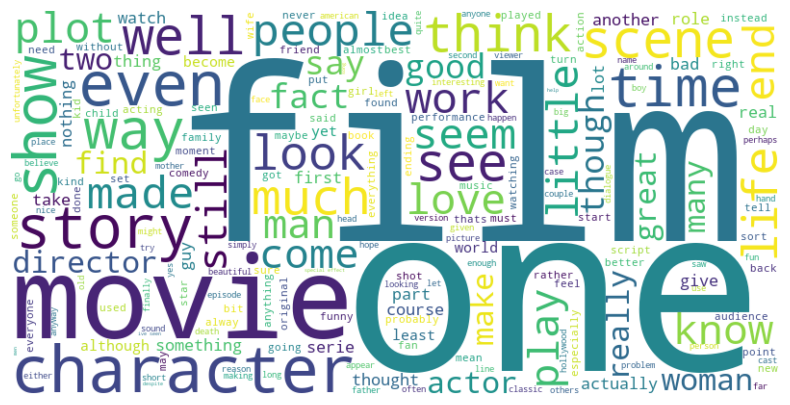

In [40]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(" ".join(df['cleaned_review']))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [41]:
df.groupby('y')['text_length'].mean()


y
0    116.39364
1    119.18676
Name: text_length, dtype: float64

The results show that positive texts are slightly longer than negative ones, with an average difference of approximately 3 words.
However, this difference is very small and is unlikely to be a strong discriminative feature.

This suggests that:

Both sentiment classes have similar text structures

Text length alone is not sufficient to predict sentiment

The model should primarily rely on lexical features rather than text size

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X = df['cleaned_review']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True,
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [65]:
y_pred = model.predict(X_test_tfidf)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [67]:
model.predict(tfidf.transform(["i don t like this movie it is so bad"]))

array([0])

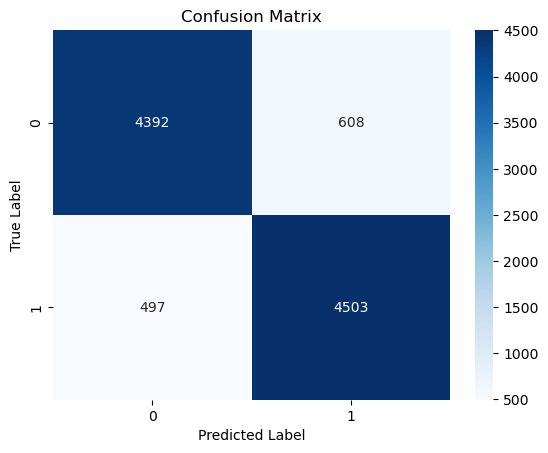

In [68]:
show = True
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [69]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8895

In [70]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
xgb_y_pred = xgb_model.predict(X_test_tfidf)
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_pred))

/home/kevin/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [11:17:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5000
           1       0.84      0.87      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



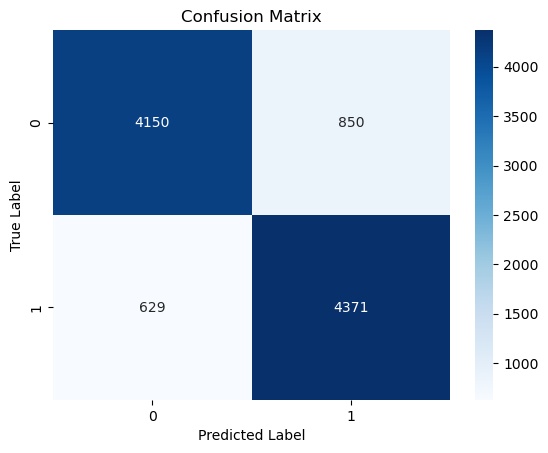

In [71]:
cm = confusion_matrix(y_test, xgb_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)
dt_y_pred = dt_model.predict(X_test_tfidf)
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5000
           1       0.72      0.71      0.72      5000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [73]:
from sklearn.svm import LinearSVC

# Linear SVM is often a strong performer for TF-IDF text classification
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
smv_y_pred = svm.predict(X_test_tfidf)
print(classification_report(y_test, smv_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



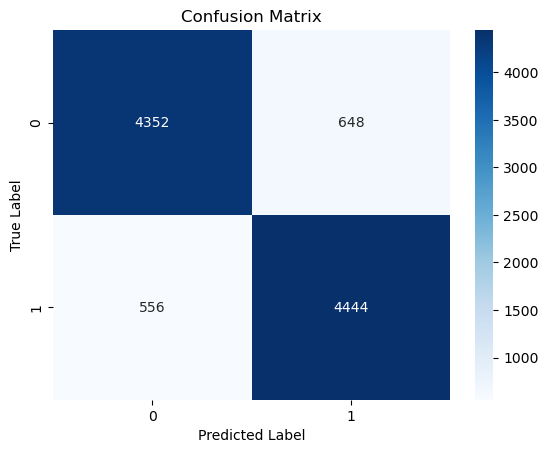

In [74]:
cm = confusion_matrix(y_test, smv_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

pipe = Pipeline([
    ("clean", FunctionTransformer(clean_text_series, validate=False)),
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.95, sublinear_tf=True, stop_words='english')),
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



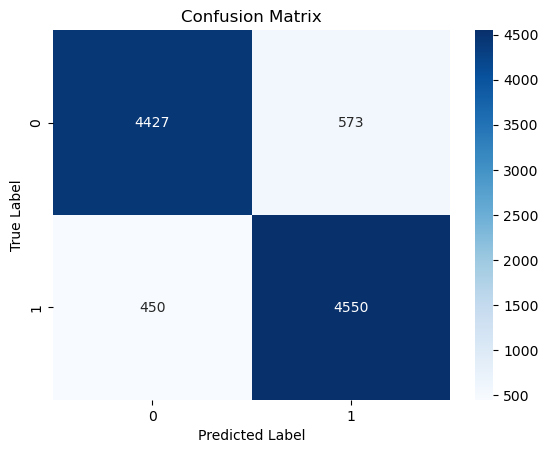

In [82]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [84]:
import joblib

# Save the trained pipeline
joblib.dump(pipe, "/home/kevin/Downloads/sentiment_analysis_pipeline.joblib")


['/home/kevin/Downloads/sentiment_analysis_pipeline.joblib']